<a href="https://colab.research.google.com/github/huskeypm/tutorials/blob/master/opencvEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

download/display image


In [ ]:
!curl -o logo.png https://pkhlab.sites.luc.edu/images/composite.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
#cv2_imshow(img)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1420k  100 1420k    0     0   814k      0  0:00:01  0:00:01 --:--:--  814k


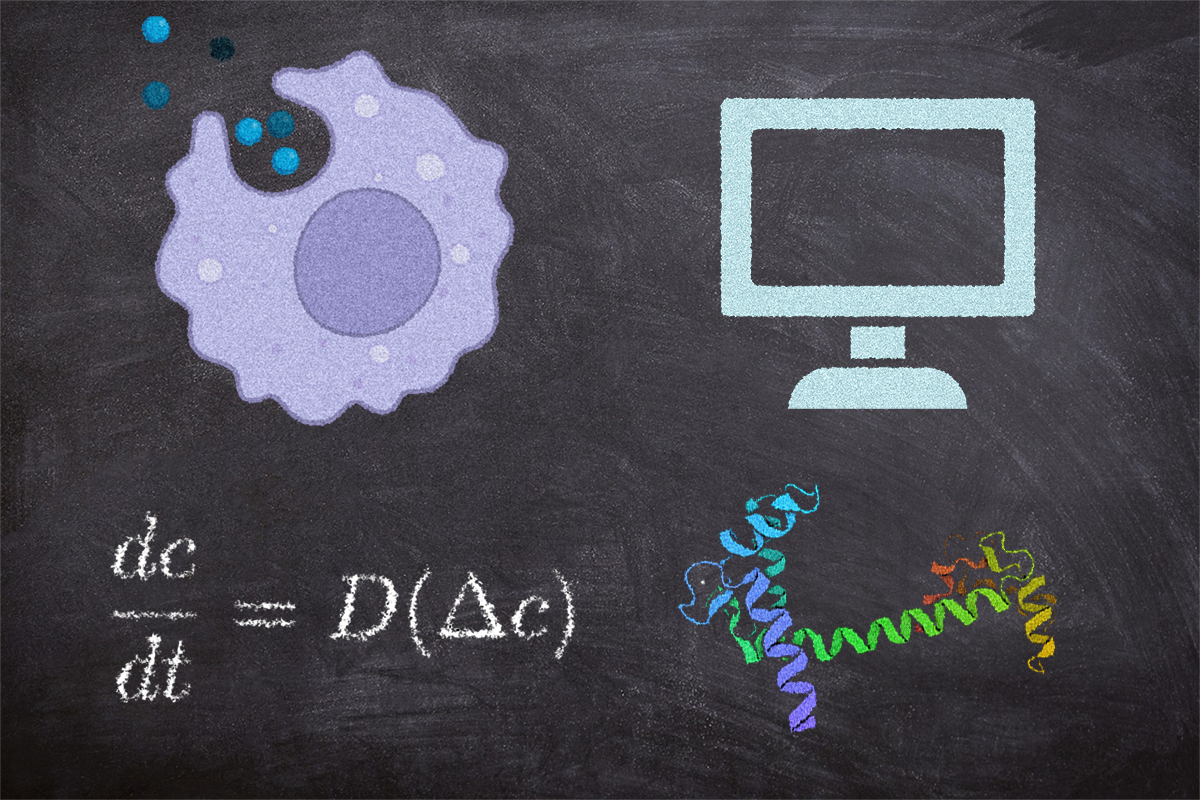

In [ ]:
cv2_imshow(img)

resize the monstrosity

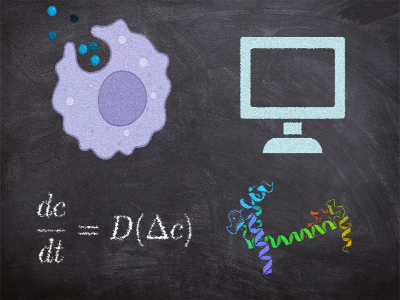

In [ ]:
resized_img = cv2.resize(img, (400, 300))
cv2_imshow(resized_img)
img=resized_img

Rotate the image along regular intervals

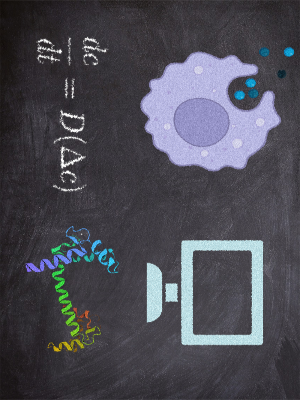

In [ ]:
rotated_image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(rotated_image)

Increase the dynamic range of your data by 'thresholding' to the range you want. THe show function essentially interpolates that range over 0..255 to display it

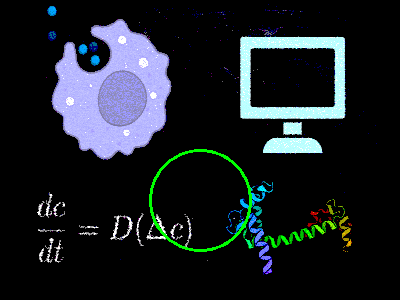

In [ ]:
# increasing dynamic range
labeled = img.copy()
labeled[labeled < 100] = 0
labeled[labeled > 200] = 255

cv2.circle(labeled, (200, 200), 50, (0, 255, 0), 2)
cv2_imshow(labeled)

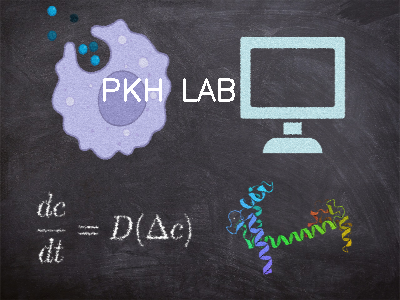

In [ ]:
labeled = img.copy()
cv2.putText(labeled, 'PKH LAB', (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2_imshow(labeled)

Simulate the effect of beer goggles by blurring

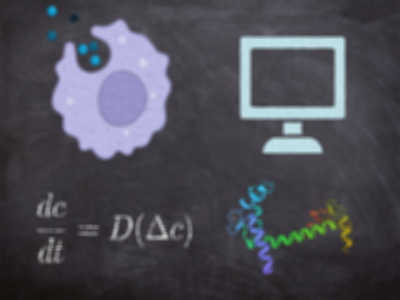

In [ ]:
blurred_image = cv2.blur(img, (5, 5))
cv2_imshow(blurred_image)

Edge detection by using the Canny approach (convolves an 'edge detection' kernel, then thresholding the response)

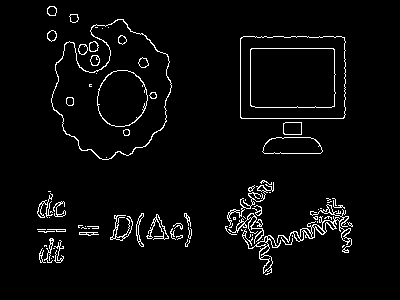

In [ ]:
edges = cv2.Canny(img, 100, 200)
cv2_imshow(edges)

Grayscale+threshold allows you to use all channels' data to represent your object

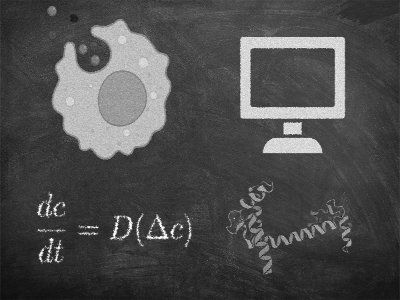

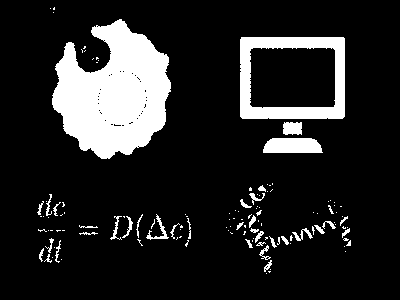

In [ ]:
grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale_image)
_, threshold_image = cv2.threshold(grayscale_image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold_image)

In this example, we embed a signal (diffusion equation) in noise (salt/pepper) and use openCV to 'find' the signal.



Here we create the salt and peppa noise

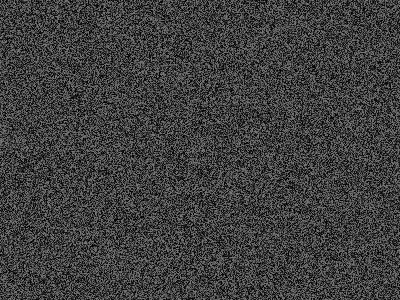

In [ ]:
# goofing around
x,y = np.shape(grayscale_image)
noise = np.random.rand(x*y)*255/2
noise = np.reshape(noise,[x,y])
cv2_imshow(noise)

here we extract the signal from my original image

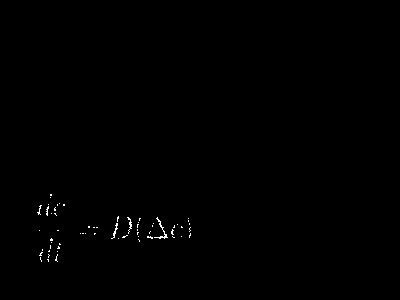

In [ ]:

signal= np.zeros([x,y],dtype=np.uint8)
signal[180:,0:200] = grayscale_image[180:,0:200]
signal[signal < 200] = 0
signal[signal >= 200] = 255
cv2_imshow(signal)


Here we combine the noise and the signal to create a 'real' image

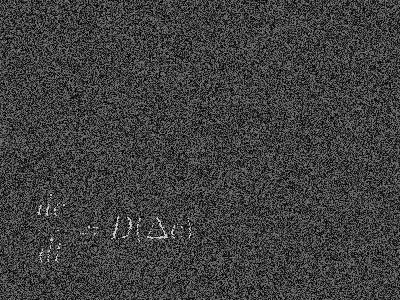

In [ ]:

# embed signal
#exImg = np.array(signal,dtype=np.float64)+0.5*noise
indices = np.where(signal > 10)

# Set the values at the found indices in the new image (50 for the first channel, 5 for the second)
exImg = noise.copy()
exImg[indices] = 200
#oimg = np.array(modified_image,dtype=np.uint8)
cv2_imshow(exImg)

Now we employ the 'matched filter' approach which states that the optimal SNR is given by multiplying your signal against the test data (not quite, but insert wikipedia def here).

To build on that concept, we 'convolve' the signal across the test data to find the best matches. When it is applied to pure noise, we should expect a low SNR response.  

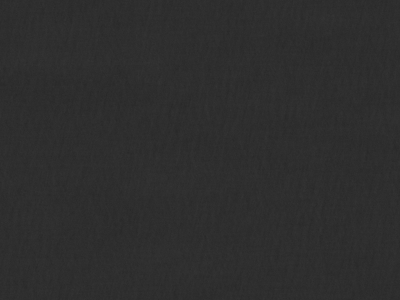

52


In [ ]:
parsevals = 1./float(x*y)
s = parsevals*np.array(signal,dtype=np.float64)
n = parsevals*np.array(noise,dtype=np.float64)
o = parsevals*np.array(exImg,dtype=np.float64)

# Perform convolution using image2 as the kernel and image1 as the input
r = cv2.filter2D(n, -1, s)
r = np.array(r * 1/parsevals,dtype=np.uint8)
cv2_imshow(r)
print(np.max(r))

Now we apply the same approach to the data that contains our signal, for which we expect a much larger SNR

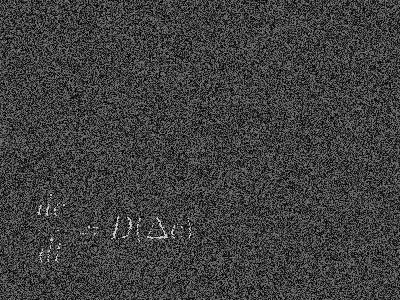

In [ ]:
cv2_imshow(exImg)

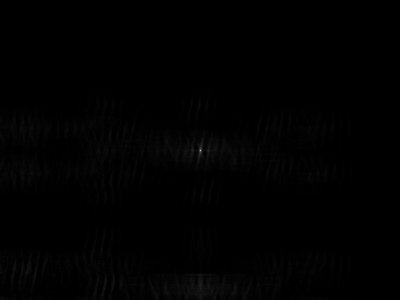

186


In [ ]:

r = cv2.filter2D(s, -1, s)
r = np.array(r * 1/parsevals,dtype=np.uint8)
cv2_imshow(r)

print(np.max(r))